# <b> <center> PI Modelisation </center></b>

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report,confusion_matrix

In [3]:
df = pd.read_csv('Final.csv',sep=',')

In [5]:
df.head()

,Unnamed: 0,typeImmatriculation_ES,typeImmatriculation_RS,typeImmatriculation_TRAC,typeImmatriculation_TU,energieVoiture_ESS-GAZ GPL,energieVoiture_ESSENCE,energieVoiture_GASOIL,marqueVoiture_AUDI,marqueVoiture_BERLIET,...,gouvernoratAssure_Siliana,gouvernoratAssure_Sousse,gouvernoratAssure_Tataouine,gouvernoratAssure_Tunis,gouvernoratAssure_Zaghouan,typePolice,naturePolice,puissanceFiscalVoiture,anneesExpAssure,classeBonusMalus
0,60,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,1,4.0,35.0,3.0
1,63,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,1,5.0,16.0,3.0
2,77,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,1,1,5.0,16.0,1.0
3,79,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,1,5.0,27.0,2.0
4,99,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,1,5.0,21.0,3.0


In [6]:
df.shape

(1060, 92)

In [7]:
df.dtypes

Unnamed: 0                                                                                 int64
typeImmatriculation_ES                                                                     int64
typeImmatriculation_RS                                                                     int64
typeImmatriculation_TRAC                                                                   int64
typeImmatriculation_TU                                                                     int64
energieVoiture_ESS-GAZ GPL                                                                 int64
energieVoiture_ESSENCE                                                                     int64
energieVoiture_GASOIL                                                                      int64
marqueVoiture_AUDI                                                                         int64
marqueVoiture_BERLIET                                                                      int64
marqueVoiture_BMW             

In [36]:
df.isna().sum()

Unnamed: 0                                                                               0
typeImmatriculation_ES                                                                   0
typeImmatriculation_RS                                                                   0
typeImmatriculation_TRAC                                                                 0
typeImmatriculation_TU                                                                   0
energieVoiture_ESS-GAZ GPL                                                               0
energieVoiture_ESSENCE                                                                   0
energieVoiture_GASOIL                                                                    0
marqueVoiture_AUDI                                                                       0
marqueVoiture_BERLIET                                                                    0
marqueVoiture_BMW                                                                        0

# Modelisation

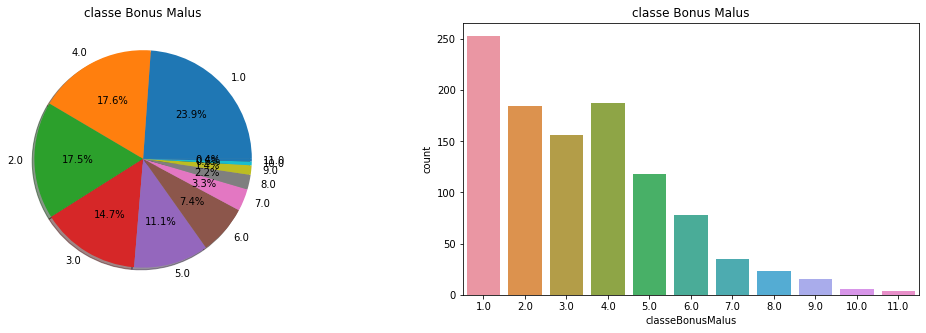

In [44]:
# Target :
f,ax=plt.subplots(1,2,figsize=(18,5))
df["classeBonusMalus"].value_counts().plot.pie(explode=None,autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('classe Bonus Malus')
ax[0].set_ylabel('')
graph= sns.countplot("classeBonusMalus",data=df,ax=ax[1])
ax[1].set_title('classe Bonus Malus')
plt.show()

In [76]:
# Fonction pour créer la matrice de confusion
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [45]:
X = df.drop(['classeBonusMalus'], axis=1)
y = df['classeBonusMalus']

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0,test_size=0.2)

# <b>KNN</b> :

In [49]:
error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Erreur')

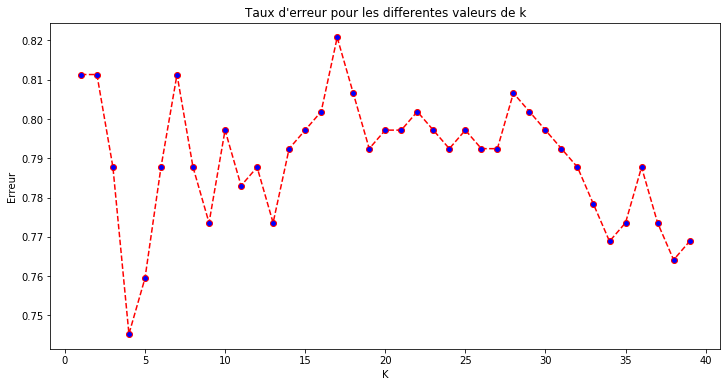

In [62]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue')
plt.title('Taux d\'erreur pour les differentes valeurs de k')
plt.xlabel('K')
plt.ylabel('Erreur')

### K optimale = 4 

In [143]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [99]:
# Appliquer knn
knn = KNeighborsClassifier(4)
knn_model = knn.fit(X_train, y_train)

## Metrics to evaluate KNN

In [100]:
print('Accuracy of KNN Model on training set: {:.2f}'
     .format(knn_model.score(X_train, y_train)))
print('Accuracy of KNN Model on test set: {:.2f}'
     .format(knn_model.score(X_test, y_test)))

Accuracy of KNN Model on training set: 0.44
Accuracy of KNN Model on test set: 0.25


In [89]:
y_pred_knn = knn_model.predict(X_test)
print(classification_report(y_test,y_pred_knn))

precision    recall  f1-score   support

         1.0       0.30      0.53      0.38        58
         2.0       0.25      0.19      0.22        42
         3.0       0.27      0.26      0.26        27
         4.0       0.09      0.09      0.09        34
         5.0       0.23      0.12      0.15        26
         6.0       0.50      0.17      0.25        12
         7.0       0.00      0.00      0.00         3
         8.0       0.00      0.00      0.00         7
         9.0       0.00      0.00      0.00         1
        10.0       0.00      0.00      0.00         2

    accuracy                           0.25       212
   macro avg       0.16      0.14      0.14       212
weighted avg       0.24      0.25      0.23       212



Confusion matrix, without normalization
[[31  8  6 10  2  1  0  0  0  0]
 [21  8  4  7  2  0  0  0  0  0]
 [11  4  7  3  2  0  0  0  0  0]
 [20  4  4  3  3  0  0  0  0  0]
 [11  3  3  4  3  1  1  0  0  0]
 [ 5  3  1  1  0  2  0  0  0  0]
 [ 2  0  0  0  1  0  0  0  0  0]
 [ 2  1  1  3  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0]
 [ 1  0  0  1  0  0  0  0  0  0]]


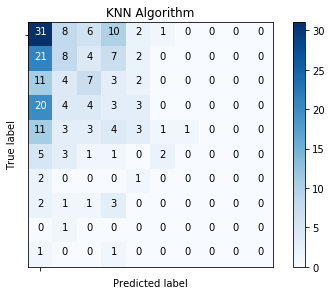

In [115]:
matrixKK = confusion_matrix(y_test, y_pred_knn)
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(matrixKK, classes=[""],title='KNN Algorithm')
plt.show()

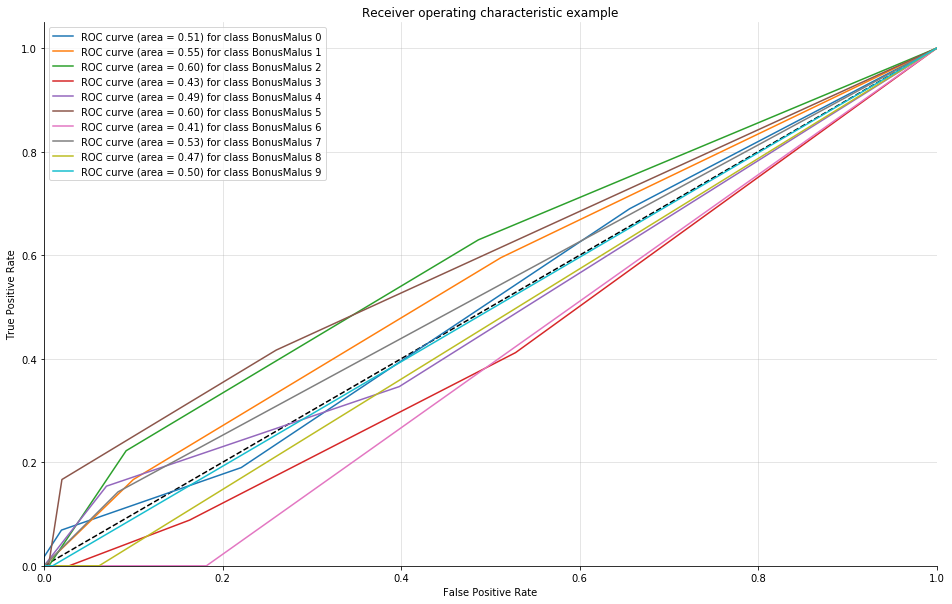

In [138]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.predict_proba(X_test)
#y_scoreKNN= knn_model.predict_proba(X_test)
    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for class BonusMalus %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(knn_model, X_test, y_test, n_classes=10, figsize=(16, 10))

# `GridSearchCV`

In [161]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV

grid_params=[{'n_neighbors':list(range(1,20))}]

grid = GridSearchCV(knn_model,grid_params,return_train_score=True).fit(X_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [162]:
table = pd.DataFrame(grid.cv_results_).loc[:, 
                ['params', 'mean_test_score', 'std_test_score','mean_train_score', 
                 'std_train_score']].sort_values(by='mean_test_score', ascending=False)

In [163]:
table

,params,mean_test_score,std_test_score,mean_train_score,std_train_score
10,{'n_neighbors': 11},0.239387,0.005854,0.338997,0.007629
9,{'n_neighbors': 10},0.234670,0.010361,0.351422,0.005975
12,{'n_neighbors': 13},0.233491,0.007236,0.334861,0.010317
8,{'n_neighbors': 9},0.232311,0.004461,0.355564,0.005541
11,{'n_neighbors': 12},0.229953,0.002335,0.340175,0.009036
7,{'n_neighbors': 8},0.227594,0.016664,0.359094,0.002889
14,{'n_neighbors': 15},0.224057,0.006686,0.331854,0.024000
16,{'n_neighbors': 17},0.221698,0.014362,0.310110,0.006763
13,{'n_neighbors': 14},0.219340,0.015470,0.333071,0.013350
17,{'n_neighbors': 18},0.212264,0.022967,0.314865,0.006440


In [164]:
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [165]:
grid.best_score_

0.23938679245283018

In [166]:
grid.best_params_

{'n_neighbors': 11}

### Grace au GridSearchCV le meilleur score obtenu est `0.239387` pour les donnée de <b>test</b> et 0.338997 pour le train pour k = 11

In [186]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')
knn_model = knn.fit(X_train, y_train)

In [187]:
print('Accuracy of KNN Model on training set: {:.2f}'
     .format(knn_model.score(X_train, y_train)))
print('Accuracy of KNN Model on test set: {:.2f}'
     .format(knn_model.score(X_test, y_test)))

Accuracy of KNN Model on training set: 0.34
Accuracy of KNN Model on test set: 0.21


# <b>2.LinearSVC</b>

# `GridSearchCV`

In [170]:
from sklearn.svm import LinearSVC
sv = LinearSVC()

In [180]:
grid_paramsSVC=[{'C':[1, 2, 4, 6, 10,20,21,22,23,24,25,26]}]

gridSVC = GridSearchCV(sv,grid_params,return_train_score=True).fit(X_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [181]:
gridSVC.best_estimator_

LinearSVC(C=20, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [182]:
gridSVC.best_score_

0.20047169811320756

In [183]:
gridSVC.best_params_

{'C': 20}

In [188]:
sv = LinearSVC(C=20, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
          
svModel=sv.fit(X_train, y_train)          

In [191]:
print('Accuracy of SVC  Model on training set: {:.2f}'
     .format(svModel.score(X_train, y_train)))
print('Accuracy of SVC Model on test set: {:.2f}'
     .format(svModel.score(X_test, y_test)))

Accuracy of SVC  Model on training set: 0.26
Accuracy of SVC Model on test set: 0.18
